### Experimenting with KNeighborsRegressor Using Only Categorical Variables

In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [2]:
# Import cleaned dataset
cleaned_airbnb_df = pd.read_csv("Resources/cleaned_airbnb_dataset4.csv", index_col=0)
cleaned_airbnb_df

,host_id,host_is_superhost,property_type,room_type,neighborhood,zipcode,accommodates,bedrooms,bathrooms,minimum_nights,...,latitude,longitude,reviews,review_scores_rating,price,cleaning_fee,total,Median,Mean,Pop
room_id,,,,,,,,,,,,,,,,,,,,,
958,1169,t,Apartment,Entire home/apt,Western Addition,94117,3,1.0,1.0,1,...,37.76931,-122.43386,217,97.0,170.0,100.0,270.0,84802.0,112291.0,39169.0
3850,4921,t,House,Private room,Inner Sunset,94131,2,1.0,1.0,1,...,37.75402,-122.45805,160,94.0,99.0,10.0,109.0,97834.0,126303.0,26881.0
5858,8904,f,Apartment,Entire home/apt,Bernal Heights,94110,5,2.0,1.0,30,...,37.74511,-122.42102,111,98.0,235.0,100.0,335.0,75106.0,98470.0,69333.0
7918,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,32,...,37.76669,-122.45250,18,86.0,65.0,50.0,115.0,84802.0,112291.0,39169.0
8142,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,32,...,37.76487,-122.45183,8,93.0,65.0,50.0,115.0,84802.0,112291.0,39169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39337552,4996407,f,Guest suite,Entire home/apt,Haight Ashbury,94117,4,1.0,1.0,2,...,37.77183,-122.43730,0,0.0,113.0,75.0,188.0,84802.0,112291.0,39169.0
39342094,4332552,f,House,Private room,Bernal Heights,94110,5,3.0,2.0,30,...,37.74010,-122.41196,0,0.0,699.0,150.0,849.0,75106.0,98470.0,69333.0
39343373,245447609,f,Condominium,Entire home/apt,Downtown/Civic Center,94102,4,1.0,1.0,1,...,37.77799,-122.42159,0,0.0,200.0,0.0,200.0,29613.0,44237.0,31176.0


### Preprocess Data

In [3]:
# Look at property_type value counts for binning
property_type_counts = cleaned_airbnb_df.property_type.value_counts()
property_type_counts

Apartment             3049
House                 2267
Condominium            853
Guest suite            573
Boutique hotel         267
Hotel                  152
Townhouse              139
Serviced apartment     120
Hostel                  92
Loft                    86
Bed and breakfast       42
Aparthotel              41
Guesthouse              41
Other                   24
Bungalow                17
Resort                  14
Cottage                 12
Villa                   10
Castle                   4
Cabin                    3
Tiny house               3
Earth house              2
Hut                      1
Dome house               1
Camper/RV                1
In-law                   1
Name: property_type, dtype: int64

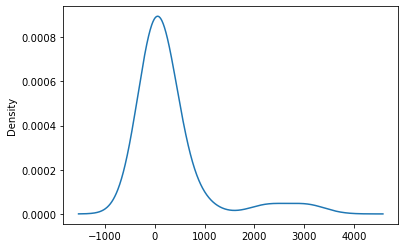

In [4]:
# Visualize the value counts of property_type
property_type_counts.plot.density()
plt.show()

In [5]:
# Determine which values to replace if property_type counts are less than 80
replace_property_type = list(property_type_counts[property_type_counts < 80].index)

# Replace in dataframe
for prop in replace_property_type:
    cleaned_airbnb_df.property_type = cleaned_airbnb_df.property_type.replace(prop,"Other")
    
# Check to make sure binning was successful
cleaned_airbnb_df.property_type.value_counts()

Apartment             3049
House                 2267
Condominium            853
Guest suite            573
Boutique hotel         267
Other                  217
Hotel                  152
Townhouse              139
Serviced apartment     120
Hostel                  92
Loft                    86
Name: property_type, dtype: int64

In [6]:
# Look at neighborhood value counts for binning 
neighborhood_counts = cleaned_airbnb_df.neighborhood.value_counts()
neighborhood_counts

Mission                  744
Downtown/Civic Center    660
South of Market          627
Western Addition         595
Castro/Upper Market      424
Haight Ashbury           389
Bernal Heights           387
Noe Valley               331
Outer Sunset             295
Nob Hill                 286
Potrero Hill             231
Inner Richmond           210
Bayview                  202
Marina                   197
Outer Richmond           182
Excelsior                179
Outer Mission            174
North Beach              171
Inner Sunset             171
Financial District       170
Russian Hill             166
Pacific Heights          151
West of Twin Peaks       136
Parkside                 130
Ocean View               120
Chinatown                112
Visitacion Valley         79
Twin Peaks                67
Glen Park                 65
Lakeshore                 61
Crocker Amazon            39
Seacliff                  22
Presidio Heights          19
Diamond Heights           17
Golden Gate Pa

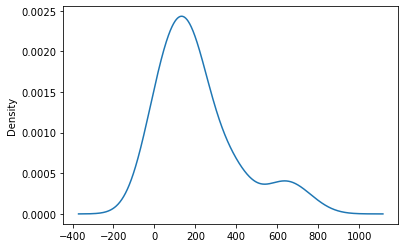

In [7]:
# Visualize the value counts of neighborhood
neighborhood_counts.plot.density()
plt.show()

In [8]:
# Determine which values to replace if neighborhood counts are less than 100
replace_neighborhood = list(neighborhood_counts[neighborhood_counts < 100].index)

# Replace in dataframe
for hood in replace_neighborhood:
    cleaned_airbnb_df.neighborhood = cleaned_airbnb_df.neighborhood.replace(hood,"Other")
    
# Check to make sure binning was successful
cleaned_airbnb_df.neighborhood.value_counts()

Mission                  744
Downtown/Civic Center    660
South of Market          627
Western Addition         595
Castro/Upper Market      424
Haight Ashbury           389
Bernal Heights           387
Other                    375
Noe Valley               331
Outer Sunset             295
Nob Hill                 286
Potrero Hill             231
Inner Richmond           210
Bayview                  202
Marina                   197
Outer Richmond           182
Excelsior                179
Outer Mission            174
North Beach              171
Inner Sunset             171
Financial District       170
Russian Hill             166
Pacific Heights          151
West of Twin Peaks       136
Parkside                 130
Ocean View               120
Chinatown                112
Name: neighborhood, dtype: int64

In [9]:
# Look at zipcode value counts for binning
zip_counts = cleaned_airbnb_df.zipcode.value_counts()
zip_counts

94110    978
94117    675
94114    638
94109    606
94103    491
94102    486
94112    403
94107    366
94122    353
94115    303
94131    280
94108    273
94133    250
94121    222
94123    221
94118    217
94116    198
94124    195
94134    151
94127    139
94105    137
94132     92
94158     77
94111     50
94104     11
94129      1
94113      1
94130      1
Name: zipcode, dtype: int64

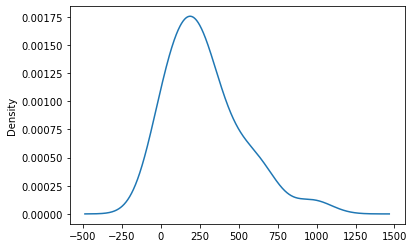

In [10]:
# Visualize the value counts of zipcode
zip_counts.plot.density()
plt.show()

In [11]:
# Determine which values to replace if zipcode counts are less than 100
replace_zipcode = list(zip_counts[zip_counts < 100].index)

# Replace in dataframe
for zcode in replace_zipcode:
    cleaned_airbnb_df.zipcode = cleaned_airbnb_df.zipcode.replace(zcode,"Other")
    
# Check to make sure binning was successful
cleaned_airbnb_df.zipcode.value_counts()

94110    978
94117    675
94114    638
94109    606
94103    491
94102    486
94112    403
94107    366
94122    353
94115    303
94131    280
94108    273
94133    250
Other    233
94121    222
94123    221
94118    217
94116    198
94124    195
94134    151
94127    139
94105    137
Name: zipcode, dtype: int64

In [12]:
cleaned_airbnb_df.dtypes

host_id                   int64
host_is_superhost        object
property_type            object
room_type                object
neighborhood             object
zipcode                  object
accommodates              int64
bedrooms                float64
bathrooms               float64
minimum_nights            int64
maximum_nights            int64
latitude                float64
longitude               float64
reviews                   int64
review_scores_rating    float64
price                   float64
cleaning_fee            float64
total                   float64
Median                  float64
Mean                    float64
Pop                     float64
dtype: object

In [13]:
# Define the categorical features set X, called categorical_df.
# copy cleaned_airbnb_df and save as categorical_df
categorical_df = cleaned_airbnb_df.copy()

# drop host_id, latitude, longitude (not needed), 
# drop numerical variables (accomodates, bedrooms, bathrooms, minimum_nights, maximumn_nights, reviews, review_scores_rating,
#  Median, Mean, Pop)
# drop price, cleaning_fee (already aggregated into "total")
categorical_df = categorical_df.drop(["host_id", "latitude", "longitude", "accommodates", "bedrooms", "bathrooms",
                                     "minimum_nights", "maximum_nights", "reviews", "review_scores_rating", "Median",
                                     "Mean", "Pop", "price", "cleaning_fee"], axis=1)

categorical_df

,host_is_superhost,property_type,room_type,neighborhood,zipcode,total
room_id,,,,,,
958,t,Apartment,Entire home/apt,Western Addition,94117,270.0
3850,t,House,Private room,Inner Sunset,94131,109.0
5858,f,Apartment,Entire home/apt,Bernal Heights,94110,335.0
7918,t,Apartment,Private room,Haight Ashbury,94117,115.0
8142,t,Apartment,Private room,Haight Ashbury,94117,115.0
...,...,...,...,...,...,...
39337552,f,Guest suite,Entire home/apt,Haight Ashbury,94117,188.0
39342094,f,House,Private room,Bernal Heights,94110,849.0
39343373,f,Condominium,Entire home/apt,Downtown/Civic Center,94102,200.0


In [14]:
# drop "total", this is the target
categorical_df = categorical_df.drop("total", axis=1)
categorical_df

,host_is_superhost,property_type,room_type,neighborhood,zipcode
room_id,,,,,
958,t,Apartment,Entire home/apt,Western Addition,94117
3850,t,House,Private room,Inner Sunset,94131
5858,f,Apartment,Entire home/apt,Bernal Heights,94110
7918,t,Apartment,Private room,Haight Ashbury,94117
8142,t,Apartment,Private room,Haight Ashbury,94117
...,...,...,...,...,...
39337552,f,Guest suite,Entire home/apt,Haight Ashbury,94117
39342094,f,House,Private room,Bernal Heights,94110
39343373,f,Condominium,Entire home/apt,Downtown/Civic Center,94102


In [15]:
# host_is_supershost only
categorical_superhost_df = categorical_df.drop(["property_type", "room_type", "neighborhood", "zipcode"], axis=1)
categorical_superhost_df

# drop "total", this is the target
#categorical_superhost_df = categorical_superhost_df.drop("total", axis=1)
#categorical_superhost_df

,host_is_superhost
room_id,
958,t
3850,t
5858,f
7918,t
8142,t
...,...
39337552,f
39342094,f
39343373,f


In [16]:
# property_type only
categorical_property_type_df = categorical_df.drop(["host_is_superhost", "room_type", "neighborhood", "zipcode"], axis=1)
categorical_property_type_df

,property_type
room_id,
958,Apartment
3850,House
5858,Apartment
7918,Apartment
8142,Apartment
...,...
39337552,Guest suite
39342094,House
39343373,Condominium


In [17]:
# room_type only
categorical_room_type_df = categorical_df.drop(["host_is_superhost", "property_type", "neighborhood", "zipcode"], axis=1)
categorical_room_type_df

,room_type
room_id,
958,Entire home/apt
3850,Private room
5858,Entire home/apt
7918,Private room
8142,Private room
...,...
39337552,Entire home/apt
39342094,Private room
39343373,Entire home/apt


In [18]:
# neighborhood only
categorical_neighborhood_df = categorical_df.drop(["host_is_superhost", "property_type", "room_type", "zipcode"], axis=1)
categorical_neighborhood_df

,neighborhood
room_id,
958,Western Addition
3850,Inner Sunset
5858,Bernal Heights
7918,Haight Ashbury
8142,Haight Ashbury
...,...
39337552,Haight Ashbury
39342094,Bernal Heights
39343373,Downtown/Civic Center


In [19]:
# zipcode only
categorical_zipcode_df = categorical_df.drop(["host_is_superhost", "property_type", "room_type", "neighborhood"], axis=1)
categorical_zipcode_df

,zipcode
room_id,
958,94117
3850,94131
5858,94110
7918,94117
8142,94117
...,...
39337552,94117
39342094,94110
39343373,94102


In [20]:
# Encode the categorical features
# Binary encoding using Pandas (multiple columns)
encoded_categorical_df = pd.get_dummies(categorical_df, columns=["host_is_superhost", "property_type", "room_type",
                                                                "neighborhood", "zipcode"])
encoded_categorical_df

,host_is_superhost_f,host_is_superhost_t,property_type_Apartment,property_type_Boutique hotel,property_type_Condominium,property_type_Guest suite,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,...,zipcode_94118,zipcode_94121,zipcode_94122,zipcode_94123,zipcode_94124,zipcode_94127,zipcode_94131,zipcode_94133,zipcode_94134,zipcode_Other
room_id,,,,,,,,,,,,,,,,,,,,,
958,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3850,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5858,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8142,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39337552,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39342094,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
39343373,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
encoded_categorical_with_total_df = encoded_categorical_df.copy()

encoded_categorical_with_total_df["total"] = cleaned_airbnb_df["total"]

encoded_categorical_with_total_df

,host_is_superhost_f,host_is_superhost_t,property_type_Apartment,property_type_Boutique hotel,property_type_Condominium,property_type_Guest suite,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,...,zipcode_94121,zipcode_94122,zipcode_94123,zipcode_94124,zipcode_94127,zipcode_94131,zipcode_94133,zipcode_94134,zipcode_Other,total
room_id,,,,,,,,,,,,,,,,,,,,,
958,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,270.0
3850,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,109.0
5858,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,335.0
7918,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,115.0
8142,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39337552,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,188.0
39342094,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,849.0
39343373,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200.0


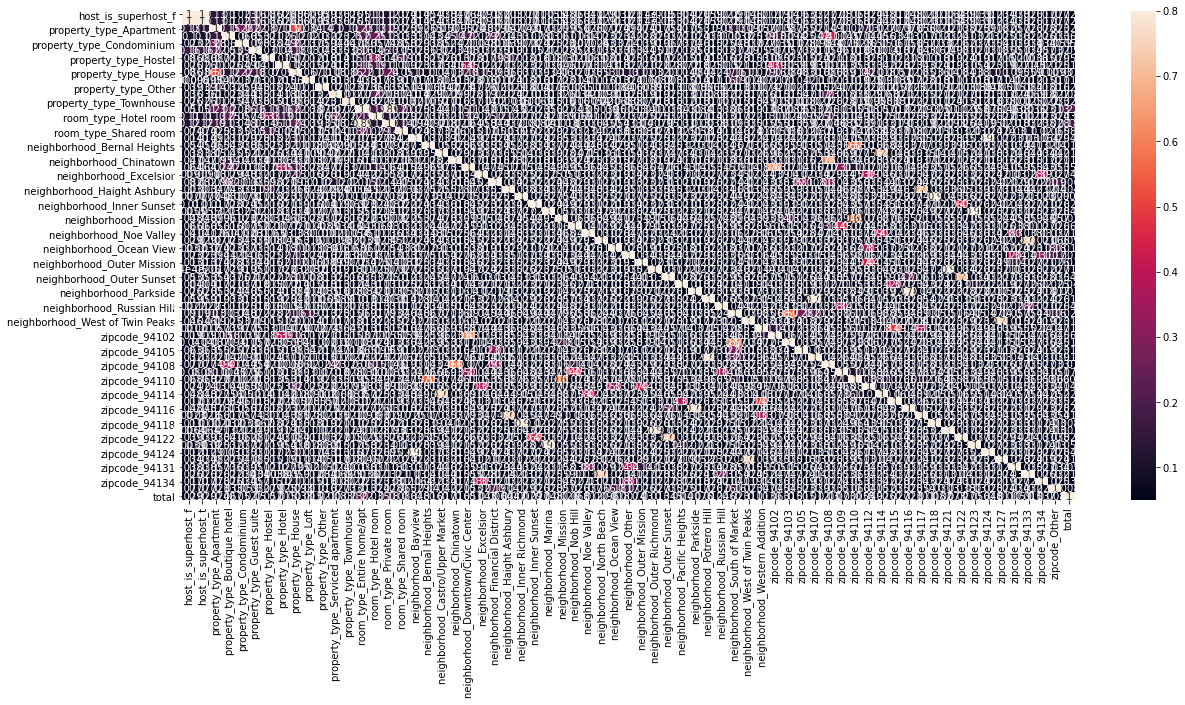

In [22]:
# heatmap
cmx = encoded_categorical_with_total_df.corr()
cmx = abs(cmx)
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cmx, vmax=0.8, vmin=0.05, annot=True)
plt.show()

In [23]:
# Encode the categorical features - host_is_superhost only
# Binary encoding using Pandas (multiple columns)
encoded_categorical_superhost_df = pd.get_dummies(categorical_superhost_df, columns=["host_is_superhost"])
encoded_categorical_superhost_df

,host_is_superhost_f,host_is_superhost_t
room_id,,
958,0,1
3850,0,1
5858,1,0
7918,0,1
8142,0,1
...,...,...
39337552,1,0
39342094,1,0
39343373,1,0


In [24]:
encoded_categorical_superhost_with_total_df = encoded_categorical_superhost_df.copy()

encoded_categorical_superhost_with_total_df["total"] = cleaned_airbnb_df["total"]

encoded_categorical_superhost_with_total_df

,host_is_superhost_f,host_is_superhost_t,total
room_id,,,
958,0,1,270.0
3850,0,1,109.0
5858,1,0,335.0
7918,0,1,115.0
8142,0,1,115.0
...,...,...,...
39337552,1,0,188.0
39342094,1,0,849.0
39343373,1,0,200.0


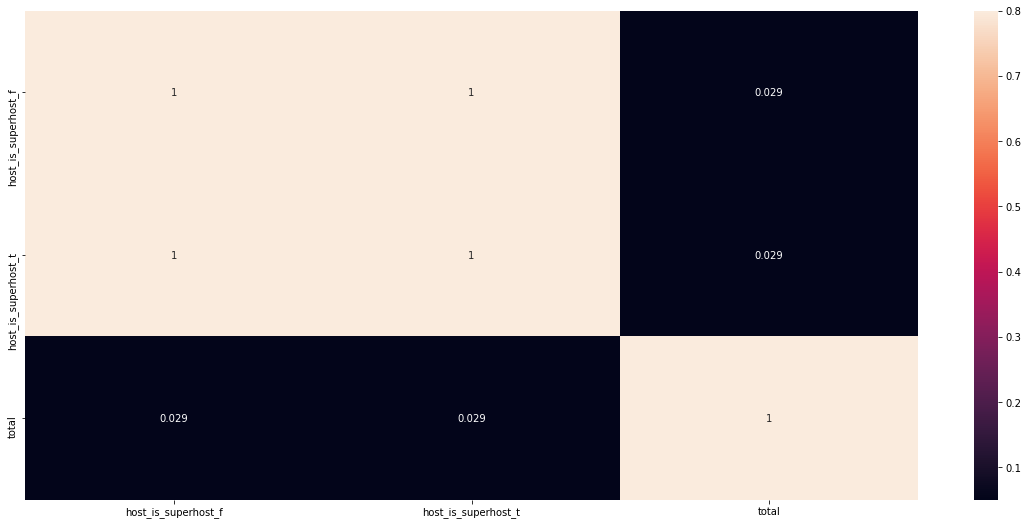

In [25]:
# heatmap
cmx = encoded_categorical_superhost_with_total_df.corr()
cmx = abs(cmx)
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cmx, vmax=0.8, vmin=0.05, annot=True)
plt.show()

In [27]:
# Encode the categorical features - property_type only
# Binary encoding using Pandas (multiple columns)
encoded_categorical_property_type_df = pd.get_dummies(categorical_property_type_df, columns=["property_type"])
encoded_categorical_property_type_df

,property_type_Apartment,property_type_Boutique hotel,property_type_Condominium,property_type_Guest suite,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse
room_id,,,,,,,,,,,
958,1,0,0,0,0,0,0,0,0,0,0
3850,0,0,0,0,0,0,1,0,0,0,0
5858,1,0,0,0,0,0,0,0,0,0,0
7918,1,0,0,0,0,0,0,0,0,0,0
8142,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
39337552,0,0,0,1,0,0,0,0,0,0,0
39342094,0,0,0,0,0,0,1,0,0,0,0
39343373,0,0,1,0,0,0,0,0,0,0,0


In [28]:
encoded_categorical_property_type_with_total_df = encoded_categorical_property_type_df.copy()

encoded_categorical_property_type_with_total_df["total"] = cleaned_airbnb_df["total"]

encoded_categorical_property_type_with_total_df

,property_type_Apartment,property_type_Boutique hotel,property_type_Condominium,property_type_Guest suite,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Townhouse,total
room_id,,,,,,,,,,,,
958,1,0,0,0,0,0,0,0,0,0,0,270.0
3850,0,0,0,0,0,0,1,0,0,0,0,109.0
5858,1,0,0,0,0,0,0,0,0,0,0,335.0
7918,1,0,0,0,0,0,0,0,0,0,0,115.0
8142,1,0,0,0,0,0,0,0,0,0,0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39337552,0,0,0,1,0,0,0,0,0,0,0,188.0
39342094,0,0,0,0,0,0,1,0,0,0,0,849.0
39343373,0,0,1,0,0,0,0,0,0,0,0,200.0


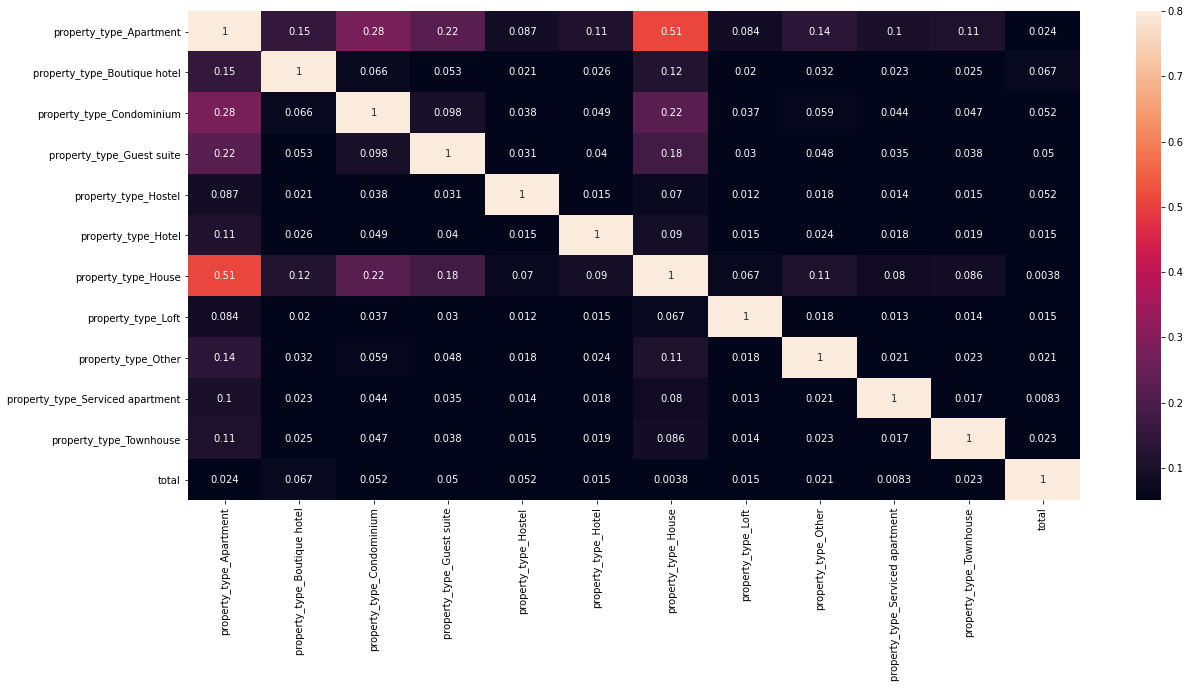

In [29]:
# heatmap
cmx = encoded_categorical_property_type_with_total_df.corr()
cmx = abs(cmx)
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cmx, vmax=0.8, vmin=0.05, annot=True)
plt.show()

In [30]:
# Encode the categorical features - room_type only
# Binary encoding using Pandas (multiple columns)
encoded_categorical_room_type_df = pd.get_dummies(categorical_room_type_df, columns=["room_type"])
encoded_categorical_room_type_df

,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
room_id,,,,
958,1,0,0,0
3850,0,0,1,0
5858,1,0,0,0
7918,0,0,1,0
8142,0,0,1,0
...,...,...,...,...
39337552,1,0,0,0
39342094,0,0,1,0
39343373,1,0,0,0


In [31]:
encoded_categorical_room_type_with_total_df = encoded_categorical_room_type_df.copy()

encoded_categorical_room_type_with_total_df["total"] = cleaned_airbnb_df["total"]

encoded_categorical_room_type_with_total_df

,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,total
room_id,,,,,
958,1,0,0,0,270.0
3850,0,0,1,0,109.0
5858,1,0,0,0,335.0
7918,0,0,1,0,115.0
8142,0,0,1,0,115.0
...,...,...,...,...,...
39337552,1,0,0,0,188.0
39342094,0,0,1,0,849.0
39343373,1,0,0,0,200.0


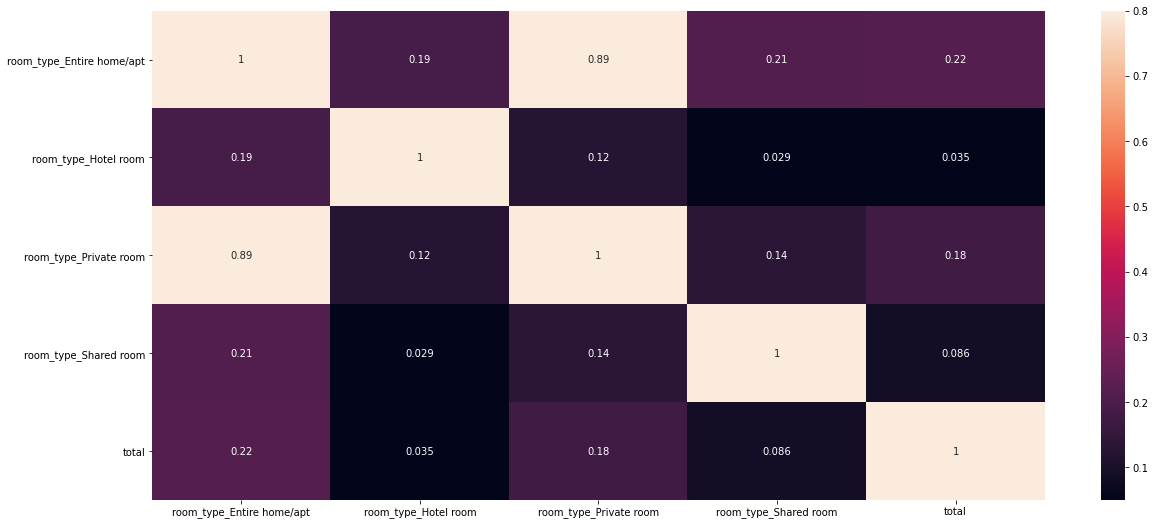

In [32]:
# heatmap
cmx = encoded_categorical_room_type_with_total_df.corr()
cmx = abs(cmx)
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cmx, vmax=0.8, vmin=0.05, annot=True)
plt.show()

In [33]:
# Encode the categorical features - neighborhood only
# Binary encoding using Pandas (multiple columns)
encoded_categorical_neighborhood_df = pd.get_dummies(categorical_neighborhood_df, columns=["neighborhood"])
encoded_categorical_neighborhood_df

,neighborhood_Bayview,neighborhood_Bernal Heights,neighborhood_Castro/Upper Market,neighborhood_Chinatown,neighborhood_Downtown/Civic Center,neighborhood_Excelsior,neighborhood_Financial District,neighborhood_Haight Ashbury,neighborhood_Inner Richmond,neighborhood_Inner Sunset,...,neighborhood_Outer Mission,neighborhood_Outer Richmond,neighborhood_Outer Sunset,neighborhood_Pacific Heights,neighborhood_Parkside,neighborhood_Potrero Hill,neighborhood_Russian Hill,neighborhood_South of Market,neighborhood_West of Twin Peaks,neighborhood_Western Addition
room_id,,,,,,,,,,,,,,,,,,,,,
958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3850,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5858,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8142,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39337552,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
39342094,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39343373,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
encoded_categorical_neighborhood_with_total_df = encoded_categorical_neighborhood_df.copy()

encoded_categorical_neighborhood_with_total_df["total"] = cleaned_airbnb_df["total"]

encoded_categorical_neighborhood_with_total_df

,neighborhood_Bayview,neighborhood_Bernal Heights,neighborhood_Castro/Upper Market,neighborhood_Chinatown,neighborhood_Downtown/Civic Center,neighborhood_Excelsior,neighborhood_Financial District,neighborhood_Haight Ashbury,neighborhood_Inner Richmond,neighborhood_Inner Sunset,...,neighborhood_Outer Richmond,neighborhood_Outer Sunset,neighborhood_Pacific Heights,neighborhood_Parkside,neighborhood_Potrero Hill,neighborhood_Russian Hill,neighborhood_South of Market,neighborhood_West of Twin Peaks,neighborhood_Western Addition,total
room_id,,,,,,,,,,,,,,,,,,,,,
958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,270.0
3850,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,109.0
5858,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,335.0
7918,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,115.0
8142,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39337552,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,188.0
39342094,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,849.0
39343373,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200.0


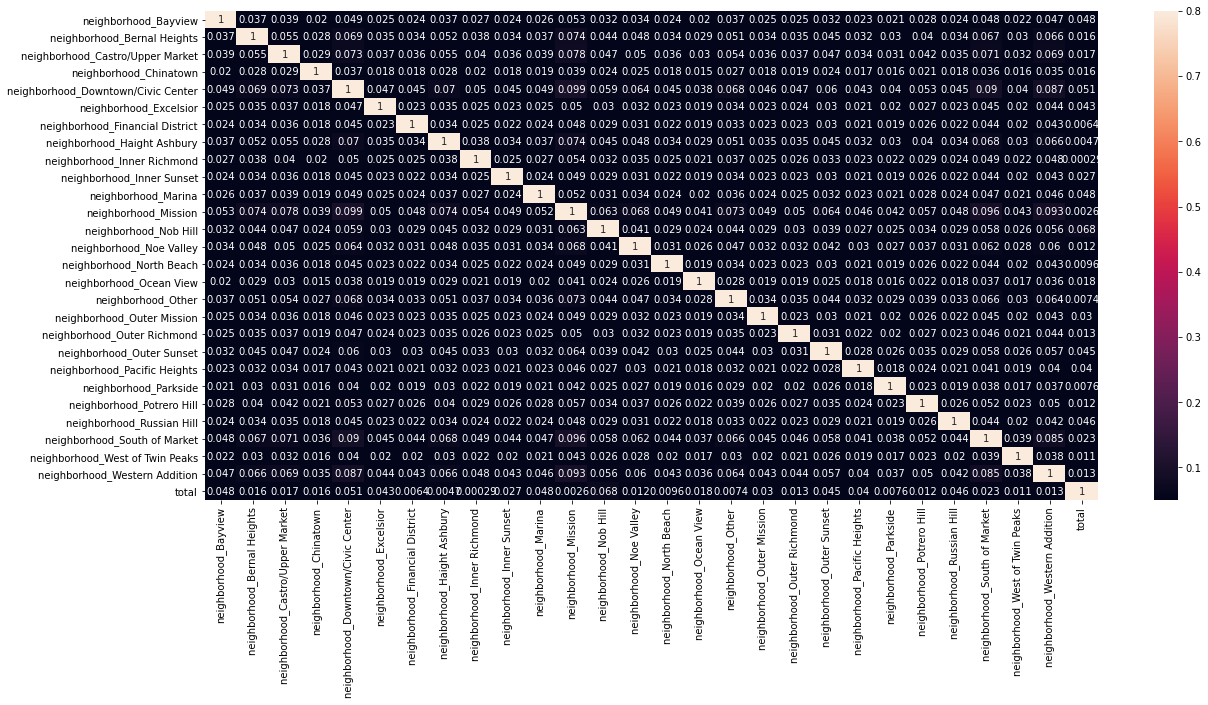

In [35]:
# heatmap
cmx = encoded_categorical_neighborhood_with_total_df.corr()
cmx = abs(cmx)
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cmx, vmax=0.8, vmin=0.05, annot=True)
plt.show()

In [36]:
# Encode the categorical features - zipcode only
# Binary encoding using Pandas (multiple columns)
encoded_categorical_zipcode_df = pd.get_dummies(categorical_zipcode_df, columns=["zipcode"])
encoded_categorical_zipcode_df

,zipcode_94102,zipcode_94103,zipcode_94105,zipcode_94107,zipcode_94108,zipcode_94109,zipcode_94110,zipcode_94112,zipcode_94114,zipcode_94115,...,zipcode_94118,zipcode_94121,zipcode_94122,zipcode_94123,zipcode_94124,zipcode_94127,zipcode_94131,zipcode_94133,zipcode_94134,zipcode_Other
room_id,,,,,,,,,,,,,,,,,,,,,
958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5858,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39337552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39342094,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39343373,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
encoded_categorical_zipcode_with_total_df = encoded_categorical_zipcode_df.copy()

encoded_categorical_zipcode_with_total_df ["total"] = cleaned_airbnb_df["total"]

encoded_categorical_zipcode_with_total_df 

,zipcode_94102,zipcode_94103,zipcode_94105,zipcode_94107,zipcode_94108,zipcode_94109,zipcode_94110,zipcode_94112,zipcode_94114,zipcode_94115,...,zipcode_94121,zipcode_94122,zipcode_94123,zipcode_94124,zipcode_94127,zipcode_94131,zipcode_94133,zipcode_94134,zipcode_Other,total
room_id,,,,,,,,,,,,,,,,,,,,,
958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,270.0
3850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,109.0
5858,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,335.0
7918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,115.0
8142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39337552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,188.0
39342094,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,849.0
39343373,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200.0


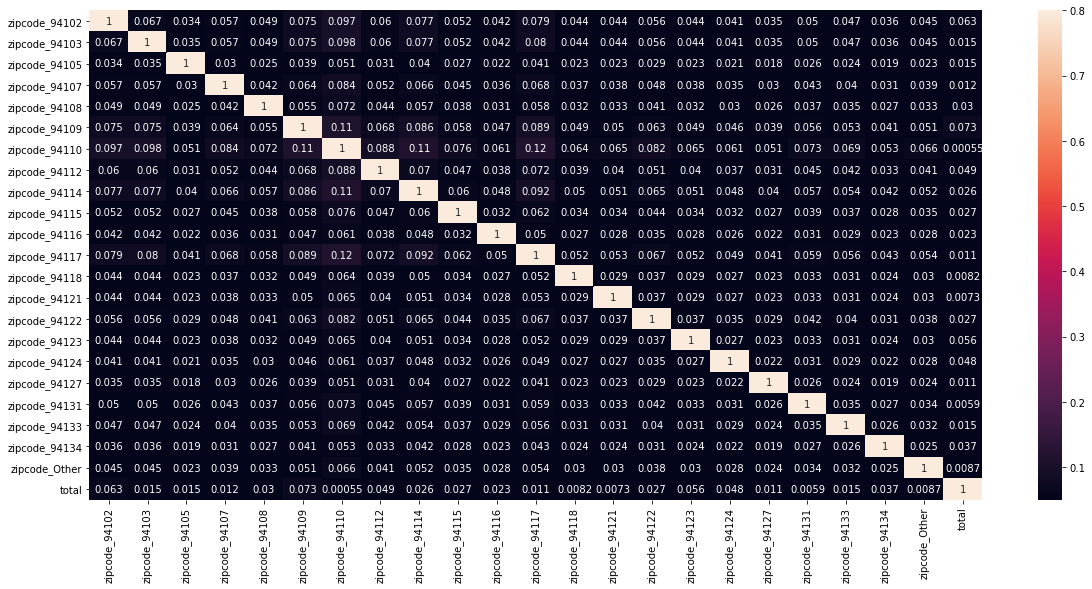

In [39]:
# heatmap
cmx = encoded_categorical_zipcode_with_total_df .corr()
cmx = abs(cmx)
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cmx, vmax=0.8, vmin=0.05, annot=True)
plt.show()

### KNRegressor with All Categorical Features

In [550]:
# Split our preprocessed data into our features and target arrays
target_y = cleaned_airbnb_df["total"]
features_X = encoded_categorical_df

In [551]:
# Splitting into Train and Test sets.
features_X_train, features_X_test, target_y_train, target_y_test = train_test_split(features_X, target_y, test_size=0.25,
                                                                                        random_state=78)

In [552]:
# Determine the shape of our training and testing sets.
print(features_X_train.shape)
print(features_X_test.shape)
print(target_y_train.shape)
print(target_y_test.shape)

(5861, 66)
(1954, 66)
(5861,)
(1954,)


In [553]:
# Instantiate the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=4, algorithm="brute")

In [554]:
# Fit the model
knn.fit(features_X_train, target_y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=4)

In [555]:
# Predict total with test data
target_y_pred = knn.predict(features_X_test)

In [556]:
target_y_pred

array([478.75, 196.25, 316.  , ..., 423.5 , 349.25, 259.25])

In [557]:
#Calculate R2 Score for Model
print("R2 Score =", metrics.r2_score(target_y_test, target_y_pred))

#Calculate Root Mean Square Error
print("RMSE for KNeighborsRegressor for Categorical Features Only =", 
      np.sqrt(mean_squared_error(target_y_test, target_y_pred)))

R2 Score = 0.44282817205305225
RMSE for KNeighborsRegressor for Categorical Features Only = 409.6451756189511


### KNRegressor with host_is_superhost only

In [589]:
# Split our preprocessed data into our features and target arrays
target_y = cleaned_airbnb_df["total"]
features_X = encoded_categorical_superhost_df

In [590]:
# Splitting into Train and Test sets.
features_X_train, features_X_test, target_y_train, target_y_test = train_test_split(features_X, target_y, test_size=0.30,
                                                                                        random_state=78)

In [591]:
# Determine the shape of our training and testing sets.
print(features_X_train.shape)
print(features_X_test.shape)
print(target_y_train.shape)
print(target_y_test.shape)

(5470, 2)
(2345, 2)
(5470,)
(2345,)


In [592]:
# Instantiate the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=5, algorithm="brute")

In [593]:
# Fit the model
knn.fit(features_X_train, target_y_train)

KNeighborsRegressor(algorithm='brute')

In [594]:
# Predict total with test data
target_y_pred = knn.predict(features_X_test)

In [595]:
target_y_pred

array([263., 263., 297., ..., 263., 263., 263.])

In [596]:
#Calculate R2 Score for Model
print("R2 Score =", metrics.r2_score(target_y_test, target_y_pred))

#Calculate Root Mean Square Error
print("RMSE for KNeighborsRegressor for Superhost Only =", 
      np.sqrt(mean_squared_error(target_y_test, target_y_pred)))

R2 Score = -0.011601308535880817
RMSE for KNeighborsRegressor for Superhost Only = 514.4853528056938


### KNRegressor with property_type only

In [597]:
# Split our preprocessed data into our features and target arrays
target_y = cleaned_airbnb_df["total"]
features_X = encoded_categorical_property_type_df

In [598]:
# Splitting into Train and Test sets.
features_X_train, features_X_test, target_y_train, target_y_test = train_test_split(features_X, target_y, test_size=0.25,
                                                                                        random_state=78)

In [599]:
# Determine the shape of our training and testing sets.
print(features_X_train.shape)
print(features_X_test.shape)
print(target_y_train.shape)
print(target_y_test.shape)

(5861, 11)
(1954, 11)
(5861,)
(1954,)


In [600]:
# Instantiate the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=4, algorithm="brute")

In [601]:
# Fit the model
knn.fit(features_X_train, target_y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=4)

In [602]:
# Predict total with test data
target_y_pred = knn.predict(features_X_test)

In [603]:
target_y_pred

array([233.75, 274.25, 274.25, ..., 274.25, 392.5 , 233.75])

In [604]:
#Calculate R2 Score for Model
print("R2 Score =", metrics.r2_score(target_y_test, target_y_pred))

#Calculate Root Mean Square Error
print("RMSE for KNeighborsRegressor for Property Type Only =", 
      np.sqrt(mean_squared_error(target_y_test, target_y_pred)))

R2 Score = -0.015115231125770956
RMSE for KNeighborsRegressor for Property Type Only = 552.9310034433167


### KNRegressor with room_type only

In [613]:
# Split our preprocessed data into our features and target arrays
target_y = cleaned_airbnb_df["total"]
features_X = encoded_categorical_room_type_df

In [614]:
# Splitting into Train and Test sets.
features_X_train, features_X_test, target_y_train, target_y_test = train_test_split(features_X, target_y, test_size=0.30,
                                                                                        random_state=78)

In [615]:
# Determine the shape of our training and testing sets.
print(features_X_train.shape)
print(features_X_test.shape)
print(target_y_train.shape)
print(target_y_test.shape)

(5470, 4)
(2345, 4)
(5470,)
(2345,)


In [616]:
# Instantiate the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=5, algorithm="brute")

In [617]:
# Fit the model
knn.fit(features_X_train, target_y_train)

KNeighborsRegressor(algorithm='brute')

In [618]:
# Predict total with test data
target_y_pred = knn.predict(features_X_test)

In [619]:
target_y_pred

array([170.6, 361.4, 361.4, ..., 361.4, 361.4, 361.4])

In [620]:
#Calculate R2 Score for Model
print("R2 Score =", metrics.r2_score(target_y_test, target_y_pred))

#Calculate Root Mean Square Error
print("RMSE for KNeighborsRegressor for Room Type Only =", 
      np.sqrt(mean_squared_error(target_y_test, target_y_pred)))

R2 Score = 0.02920113839462346
RMSE for KNeighborsRegressor for Room Type Only = 504.00280449011586


### KNRegressor with neighborhood only 

In [629]:
# Split our preprocessed data into our features and target arrays
target_y = cleaned_airbnb_df["total"]
features_X = encoded_categorical_neighborhood_df

In [630]:
# Splitting into Train and Test sets.
features_X_train, features_X_test, target_y_train, target_y_test = train_test_split(features_X, target_y, test_size=0.30,
                                                                                        random_state=78)

In [631]:
# Determine the shape of our training and testing sets.
print(features_X_train.shape)
print(features_X_test.shape)
print(target_y_train.shape)
print(target_y_test.shape)

(5470, 27)
(2345, 27)
(5470,)
(2345,)


In [632]:
# Instantiate the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=9, algorithm="brute")

In [633]:
# Fit the model
knn.fit(features_X_train, target_y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=9)

In [634]:
# Predict total with test data
target_y_pred = knn.predict(features_X_test)

In [635]:
target_y_pred

array([199.88888889, 322.44444444, 455.        , ..., 287.66666667,
       287.66666667, 433.        ])

In [636]:
#Calculate R2 Score for Model
print("R2 Score =", metrics.r2_score(target_y_test, target_y_pred))

#Calculate Root Mean Square Error
print("RMSE for KNeighborsRegressor for Neighborhood Only =", 
      np.sqrt(mean_squared_error(target_y_test, target_y_pred)))

R2 Score = -0.017441393964855445
RMSE for KNeighborsRegressor for Neighborhood Only = 515.9683057896394


### KNRegressor with zipcode only

In [653]:
# Split our preprocessed data into our features and target arrays
target_y = cleaned_airbnb_df["total"]
features_X = encoded_categorical_zipcode_df

In [654]:
# Splitting into Train and Test sets.
features_X_train, features_X_test, target_y_train, target_y_test = train_test_split(features_X, target_y, test_size=0.25,
                                                                                        random_state=78)

In [655]:
# Determine the shape of our training and testing sets.
print(features_X_train.shape)
print(features_X_test.shape)
print(target_y_train.shape)
print(target_y_test.shape)

(5861, 22)
(1954, 22)
(5861,)
(1954,)


In [656]:
# Instantiate the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=6, algorithm="brute")

In [657]:
# Fit the model
knn.fit(features_X_train, target_y_train)

KNeighborsRegressor(algorithm='brute', n_neighbors=6)

In [658]:
# Predict total with test data
target_y_pred = knn.predict(features_X_test)

In [659]:
target_y_pred

array([156.        , 271.16666667, 380.5       , ..., 493.66666667,
       493.66666667, 521.16666667])

In [660]:
#Calculate R2 Score for Model
print("R2 Score =", metrics.r2_score(target_y_test, target_y_pred))

#Calculate Root Mean Square Error
print("RMSE for KNeighborsRegressor for Zipcode Only =", 
      np.sqrt(mean_squared_error(target_y_test, target_y_pred)))

R2 Score = -0.01217796467473109
RMSE for KNeighborsRegressor for Zipcode Only = 552.1304626826266
